In [1]:
## 导入需要的库
import numpy as np
import pandas as pd
import math
import os
import random
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

In [2]:
## 聚类结果如下所示
lb1 = [20, 1, 4, 5, 6, 9, 16, 22, 25, 34, 36, 38, 43, 44, 46, 49]
lb2 = [12, 17, 27, 2, 3, 8, 10, 21, 23, 24, 26, 29, 30, 31, 33, 37, 47, 48]
lb3 = [0, 7, 11, 13, 14, 15, 18, 19, 28, 32, 35, 39, 40, 41, 42, 45]

In [3]:
## 读取股票的对数收益率数据
data = pd.read_csv("随机挑选后的股票数据.csv")
data = data.drop(['Unnamed: 0'],axis = 1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,0.003474,0.021449,0.002544,0.026737,-0.019983,0.001678,-0.018642,0.026172,0.001667,-0.014248,...,0.018799,-0.005187,-0.005737,-0.003666,-0.010554,0.003178,-0.000530,0.005277,0.004725,-0.010532
1,-0.015129,0.021117,-0.002990,-0.006006,0.023811,0.051587,-0.011236,-0.007087,0.000000,-0.005706,...,-0.003231,0.006452,0.000000,0.006410,0.006369,-0.016000,-0.016261,0.009788,-0.003252,0.000000
2,-0.051245,0.000000,0.014773,-0.012791,-0.001982,-0.028171,0.002039,-0.051188,-0.001070,-0.009702,...,0.018603,-0.018603,0.004681,-0.018867,0.046520,-0.013731,0.009173,0.018103,0.000000,0.048147
3,-0.002189,-0.001096,-0.003289,-0.022223,-0.004503,0.015676,-0.027027,0.015854,0.014498,0.035897,...,-0.084007,0.035320,-0.105115,-0.104027,-0.010752,0.021389,0.005280,0.058766,-0.050902,-0.075915
4,0.011728,-0.006825,0.007797,-0.033567,-0.040989,0.013506,0.032490,-0.016113,-0.044635,-0.001063,...,0.008656,0.017095,0.029232,-0.014511,-0.016839,-0.008531,-0.004291,0.012822,-0.004259,0.006377


In [6]:
font1 = {'family': 'Times New Roman',
         'weight': 'normal',
         'size': 16,
         }
config = {
            "font.family": 'serif',
            "font.size": 14,# 相当于小四大小
            "mathtext.fontset": 'stix',#matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
            "font.serif": ['SimSun'],#宋体
            'axes.unicode_minus': False # 处理负号，即-号
         }
rcParams.update(config)

In [17]:
### 绘制同类与不同类股票的图像
daima = ['000068', '000554', '000650', '000673', '000708', '000862', '001896', '600112', '600139', '600339', '600376',    
         '600533', '600673', '600715', '600746', '600794']
clode = ['000068', '000554', '600139', '600794']

YY = np.zeros((4,len(data.T)))
t = 0
for i in range(len(lb1)):
    if daima[i] in clode:
        a = 1
        for j in range(0,len(data.T)):
            b = lb1[i]
            a = a + data.loc[b][j]
            YY[t][j] = a
        t = t + 1
YY

array([[1.01824418, 0.99693222, 0.96567968, ..., 0.52137831, 0.51889463,
        0.50137043],
       [0.98487112, 1.00598804, 1.0029985 , ..., 0.22881011, 0.22555808,
        0.22555808],
       [0.98542503, 0.96565467, 0.97723406, ..., 0.43352855, 0.44759191,
        0.43352855],
       [1.04480895, 1.04705314, 1.04255972, ..., 0.87011209, 0.87604769,
        0.88194684]])

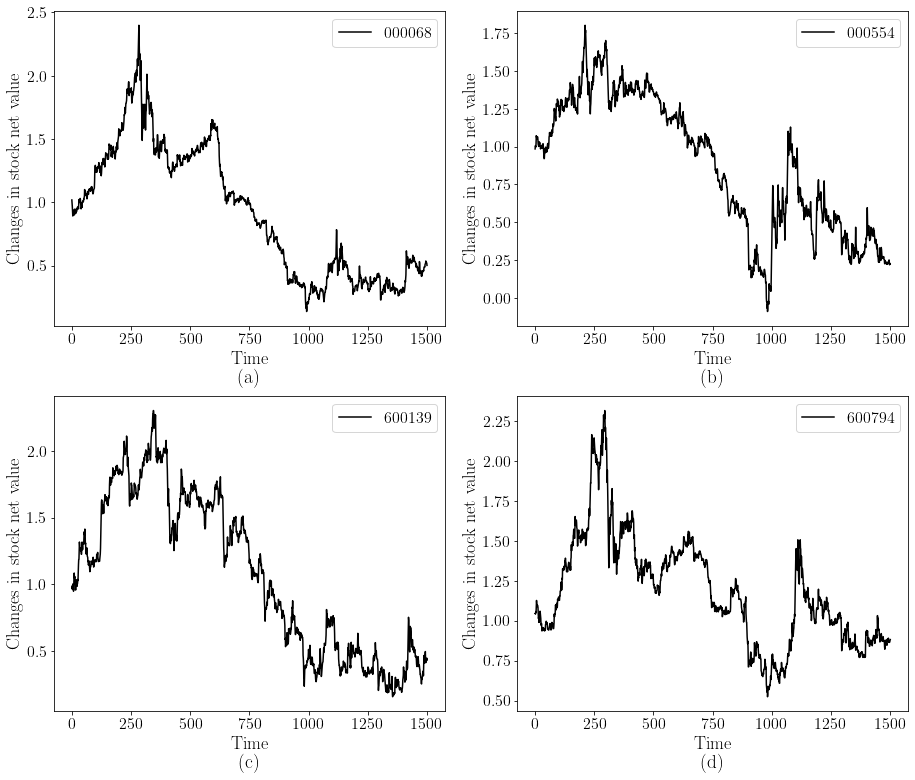

In [27]:
plt.rcParams['figure.figsize'] = (13.0, 11.0)
font1 = {'family': 'Times New Roman',
         'weight': 'normal',
         'size': 18,
         }
# 按两行两咧显示
x = np.linspace(0,1500,1500)
a = subplot(2,2,1) #在第一窗口显示
a.plot(x,YY[0],'k',label ='000068');
plt.xlabel('Time',font1)
plt.ylabel('Changes in stock net value',font1)
plt.legend(loc='upper right')
plt.title('(a)', y=-0.2)
b = subplot(2,2,2) #在第二个窗口显示
b.plot(x,YY[1],'k',label ='000554');
plt.xlabel('Time',font1)
plt.ylabel('Changes in stock net value',font1)
plt.legend(loc='upper right')
plt.title('(b)', y=-0.2)
c = subplot(2,2,3)
c.plot(x,YY[2],'k',label = '600139');
plt.xlabel('Time',font1)
plt.ylabel('Changes in stock net value',font1)
plt.legend(loc='upper right')
plt.title('(c)', y=-0.2)
d = subplot(2,2,4) 
d.plot(x,YY[3],'k',label = '600794');
plt.xlabel('Time',font1)
plt.ylabel('Changes in stock net value',font1)
plt.legend(loc='upper right')
plt.title('(d)', y=-0.2)
plt.tight_layout()
savefig("同一类股票的走势.jpg", dpi=600, bbox_inches='tight')
show()

In [28]:
### 绘制同类与不同类股票的图像
daima = ['000509', '000545', '000707', '000717', '000758', '000868', '600091', '600127', '600135', '600158', '600179',    
         '600223', '600233', '600249', '600330', '600395', '600767', '600782']
for i in range(len(lb2)):
    if daima[i] == '000707':
        Y1 = []
        a = 1
        for j in range(0,len(data.T)):
            b = lb2[i]
            a = a + data.loc[b][j]
            Y1.append(a)
            
### 绘制同类与不同类股票的图像
daima = ['000025', '000701', '000727', '000779', '000822', '000848', '000886', '000936', '600190', '600305', '600362',    
         '600538', '600604', '600612', '600638', '600742']
for i in range(len(lb3)):
    if daima[i] == '600742':
        Y2 = []
        a = 1
        for j in range(0,len(data.T)):
            b = lb3[i]
            a = a + data.loc[b][j]
            Y2.append(a)

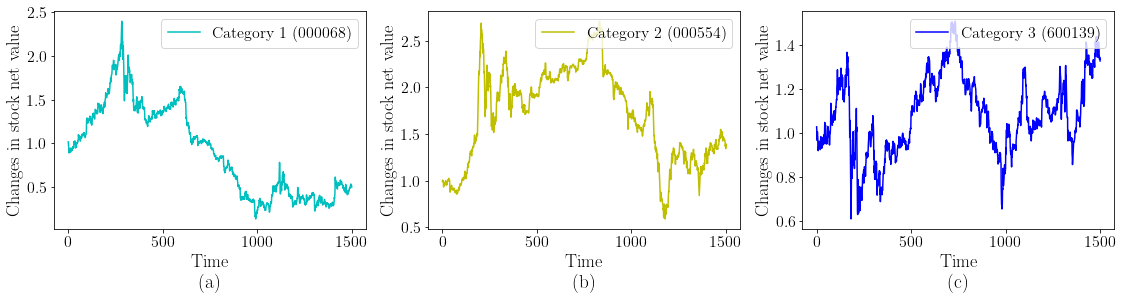

In [46]:
plt.rcParams['figure.figsize'] = (19.0, 4.0)
font1 = {'family': 'Times New Roman',
         'weight': 'normal',
         'size': 18,
         }
# 按两行两咧显示
x = np.linspace(0,1500,1500)
a = subplot(1,3,1) #在第一窗口显示
a.plot(x,YY[0],'c',label ='Category 1 (000068)');
plt.xlabel('Time',font1)
plt.ylabel('Changes in stock net value',font1)
plt.legend(loc='upper right')
plt.title('(a)', y=-0.3)
b = subplot(1,3,2) #在第二个窗口显示
b.plot(x,Y1,'y',label = 'Category 2 (000554)');
plt.xlabel('Time',font1)
plt.ylabel('Changes in stock net value',font1)
plt.legend(loc='upper right')
plt.title('(b)', y=-0.3)
c = subplot(1,3,3)
c.plot(x,Y2,'b',label = 'Category 3 (600139)');
plt.xlabel('Time',font1)
plt.ylabel('Changes in stock net value',font1)
plt.legend(loc='upper right')
plt.title('(c)', y=-0.3)
savefig("不同类股票的走势.jpg", dpi=600, bbox_inches='tight')
show()

In [47]:
## 聚类结果如下所示
lb1 = [20, 1, 4, 5, 6, 9, 16, 22, 25, 34, 36, 38, 43, 44, 46, 49]
lb2 = [12, 17, 27, 2, 3, 8, 10, 21, 23, 24, 26, 29, 30, 31, 33, 37, 47, 48]
lb3 = [0, 7, 11, 13, 14, 15, 18, 19, 28, 32, 35, 39, 40, 41, 42, 45]
l1, l2, l3 = sorted(lb1), sorted(lb2), sorted(lb3)
n1 = len(l1+l3)
n = len(data)
m = len(data.T)
data2 = np.zeros((n1,m))
t = 0
for i in range(0,n):
    if i in l1 or i in l3:
        a = 1
        for j in range(0,m):
            a = a + data.loc[i][j]
            data2[t][j] = a
        t = t + 1
data2 = pd.DataFrame(data2)

<function matplotlib.pyplot.show(*args, **kw)>

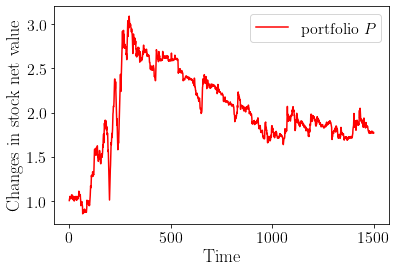

In [52]:
plt.rcParams['figure.figsize'] = (6.0, 4.0)
Y = 0.9*data2.iloc[0]+(1-0.9)*data2.iloc[31]
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
rc('font',size=16); rc('text', usetex=True)  #调用tex字库

x = np.linspace(0,1500,1500)
plot(x,Y,'r',label = 'portfolio $P$');
plt.xlabel('Time',font1)
plt.ylabel('Changes in stock net value',font1)
plt.legend(loc='upper right')
savefig("实例图1.jpg",dpi=300, bbox_inches='tight')
plt.show

In [54]:
n, m = len(data), len(data.T)
data1 = np.zeros((n,m))
t = 0
for i in range(0,n):
    a = 1
    for j in range(0,m):
        a = a + data.loc[i][j]
        data1[t][j] = a
    t = t + 1
data1 = pd.DataFrame(data1)

Y = 0.9*data1.iloc[0]+0.1*data1.iloc[49]
Y1 = 0.2 * data1.iloc[21] + 0.8 * data1.iloc[0]
Y2 = 0.3 * data1.iloc[48] + 0.7 * data1.iloc[27]
Y3 = 0.3 * data1.iloc[3] + 0.7 * data1.iloc[0]
Y4 = 0.2 * data1.iloc[5] + 0.8 * data1.iloc[26]
Y5 = 0.2 * data1.iloc[16] + 0.8 * data1.iloc[0]

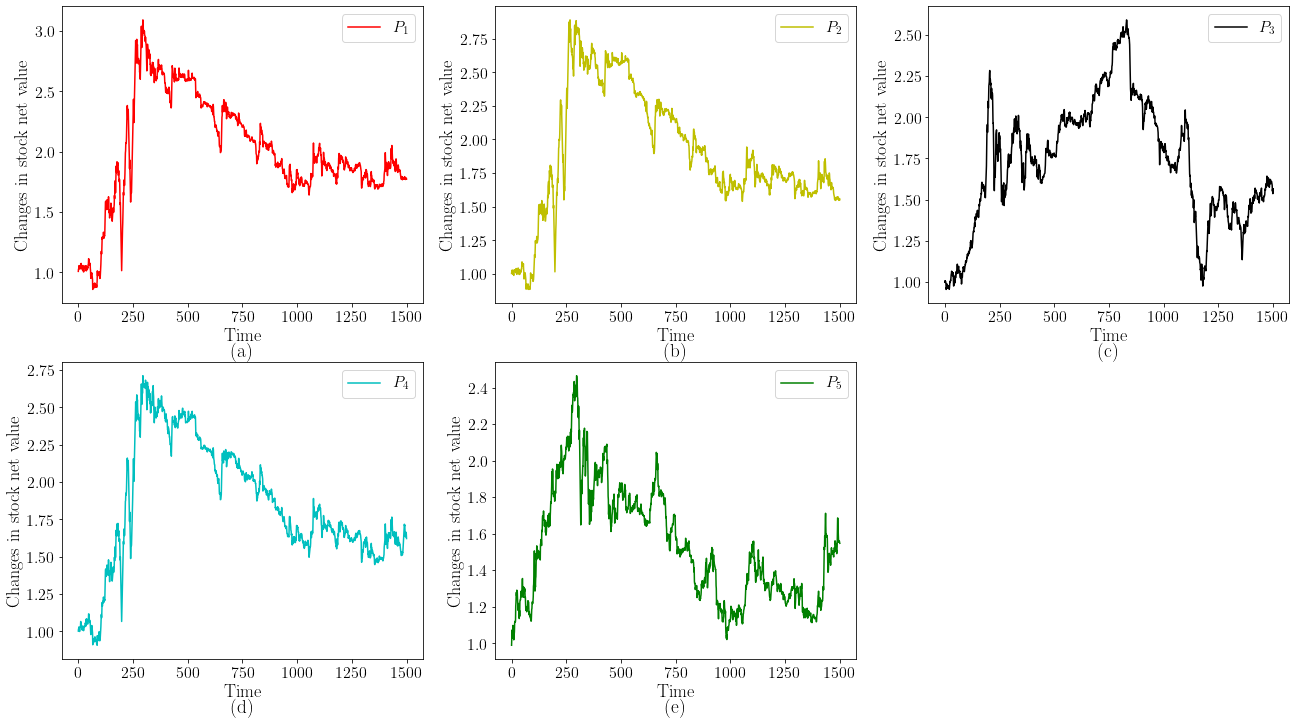

In [90]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (22.0, 12.0)
# 按两行三咧显示
a = subplot(2,3,1) #在第一窗口显示
a.plot(x,Y,'r', label = '$P_1$')
plt.xlabel('Time',font1)
plt.ylabel('Changes in stock net value',font1)
plt.legend(loc='upper right')
plt.title('(a)', y=-0.2)
b = subplot(2,3,2) #在第二个窗口显示
b.plot(x,Y1,'y',label = '$P_2$' )
plt.xlabel('Time',font1)
plt.ylabel('Changes in stock net value',font1)
plt.legend(loc='upper right')
plt.title('(b)', y=-0.2)
c = subplot(2,3,3)
c.plot(x,Y2,'k', label = '$P_3$')
plt.xlabel('Time',font1)
plt.ylabel('Changes in stock net value',font1)
plt.legend(loc='upper right')
plt.title('(c)', y=-0.2)
d = subplot(2,3,4) 
d.plot(x,Y3,'c', label = '$P_4$')
plt.xlabel('Time',font1)
plt.ylabel('Changes in stock net value',font1)
plt.legend(loc='upper right')
plt.title('(d)', y=-0.2)
e = subplot(2,3,5)
e.plot(x,Y4,'g', label = '$P_5$')
plt.xlabel('Time',font1)
plt.ylabel('Changes in stock net value',font1)
plt.legend(loc='upper right')
plt.title('(e)', y=-0.2)
savefig("比较1.jpg",dpi=600, bbox_inches='tight')
plt.show()

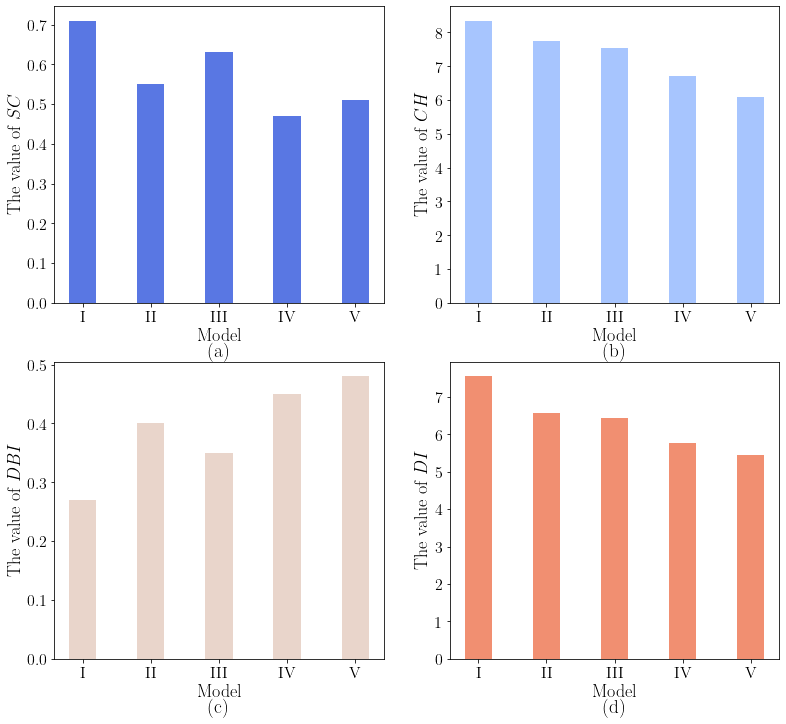

In [105]:
# X = ('Model I', 'Model II', 'Model III', 'Model IV', 'Model V') 
X = ('I', 'II', 'III', 'IV', 'V') 
Y1 = [0.71, 0.55, 0.63, 0.47, 0.51]
Y2 = [8.35, 7.75, 7.54, 6.72, 6.08]
Y3 = [0.27, 0.40, 0.35, 0.45, 0.48]
Y4 = [7.55, 6.56, 6.44, 5.78, 5.46]
plt.rcParams['figure.figsize'] = (13.0, 12.0)
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
rc('font',size=16); rc('text', usetex=True)  #调用tex字库

means = [5, 15, 25, 35, 45]
colormap = plt.get_cmap('coolwarm')
colors = colormap(np.linspace(0.1, 1, len(means)))

# 按两行三咧显示
a = subplot(2,2,1) #在第一窗口显示
a.bar(X,Y1, width=0.4, color = colors[0])
plt.xlabel('Model',font1)
plt.ylabel('The value of $SC$',font1)
plt.title('(a)', y=-0.2)
b = subplot(2,2,2) #在第二个窗口显示
b.bar(X,Y2, width=0.4, color = colors[1])
plt.xlabel('Model',font1)
plt.ylabel('The value of $CH$',font1)
plt.title('(b)', y=-0.2)
c = subplot(2,2,3)
c.bar(X,Y3, width=0.4, color = colors[2])
plt.xlabel('Model',font1)
plt.ylabel('The value of $DBI$',font1)
plt.title('(c)', y=-0.2)
d = subplot(2,2,4) 
d.bar(X,Y4, width=0.4, color = colors[3])
plt.xlabel('Model',font1)
plt.ylabel('The value of $DI$',font1)
plt.title('(d)', y=-0.2)
savefig("比较聚类1.jpg", dpi=300, bbox_inches='tight')
show()

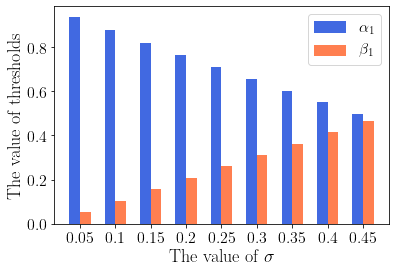

In [109]:
# 这两行代码解决 plt 中文显示的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (6.0, 4.0)
rc('font',size=16); rc('text', usetex=True)  #调用tex字库

X = ('0.05', '0.1', '0.15', '0.2', '0.25', '0.3', '0.35', '0.4', '0.45') 
Y1 = [0.9390652450288856, 0.8795798481949968, 0.8214817017658156, 0.7647122805531504, 0.7092163888503653, 0.6549419285195107, 0.6018396861930846, 0.5497915622659069, 0.49881031320202596]
Y2 = [0.052489204733861136, 0.1048079539861821, 0.15693880381758005, 0.2088648027846594, 0.2605695015112336, 0.3120369610224476, 0.3632517598617711, 0.4142919313644343, 0.4650338411904052]
bar_width = 0.3 # 条形宽度
index_male = np.arange(len(X)) # 阈值1条形图的横坐标
index_female = index_male + bar_width # 阈值2条形图的横坐标
 
# 使用两次 bar 函数画出两组条形图
plt.bar(index_male, height=Y1, width=bar_width, color='royalblue', label=r'$\alpha_1$')
plt.bar(index_female, height=Y2, width=bar_width, color='coral', label=r'$\beta_1$')

plt.xticks(index_male + bar_width/2, X)
plt.xlabel('The value of $\sigma$',font1)
plt.ylabel('The value of thresholds',font1)
plt.legend() # 显示图例
savefig("参数实验1.jpg", dpi=300, bbox_inches='tight')
plt.show()

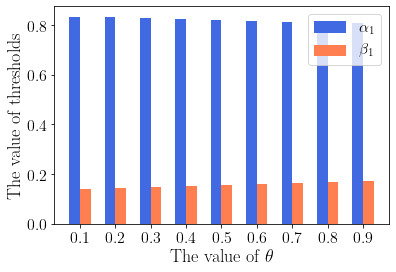

In [141]:
X = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 
Y1 = [0.8344121538709333, 0.8313879292245517, 0.8283285119304953, 0.8249345238173243, 0.8214817017658156, 0.8180033521728499, 0.8143149312520819, 0.8105891643386814, 0.8068422117808709]
Y2 = [0.14170754104983857, 0.14525800277113274, 0.14884615453215763, 0.15330935802710022, 0.15693880381758005, 0.16060216153379542, 0.16510130626568836, 0.16907808140429847, 0.17282561779846115]

plt.rcParams['figure.figsize'] = (6.0, 4.0)
bar_width = 0.3 # 条形宽度
index_male = np.arange(len(X)) # 阈值1条形图的横坐标
index_female = index_male + bar_width # 阈值2条形图的横坐标
# 使用两次 bar 函数画出两组条形图
plt.bar(index_male, height=Y1, width=bar_width, color='royalblue', label=r'$\alpha_1$')
plt.bar(index_female, height=Y2, width=bar_width, color='coral', label=r'$\beta_1$')
plt.xticks(index_male + bar_width/2, X)
plt.xlabel('The value of 'r'$\theta$',font1)
plt.ylabel('The value of thresholds',font1)
plt.legend() # 显示图例
savefig("参数实验2.jpg", dpi=300, bbox_inches='tight')
plt.show()

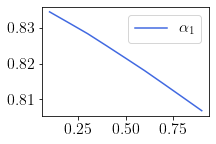

In [143]:
plt.rcParams['figure.figsize'] = (3.0, 2.0)
X = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 
Y1 = [0.8344121538709333, 0.8313879292245517, 0.8283285119304953, 0.8249345238173243, 0.8214817017658156, 0.8180033521728499, 0.8143149312520819, 0.8105891643386814, 0.8068422117808709]
plt.plot(X, Y1, color='royalblue', label=r'$\alpha_1$')
plt.legend() # 显示图例
savefig("参数实验3.jpg", dpi=300, bbox_inches='tight')
plt.show()

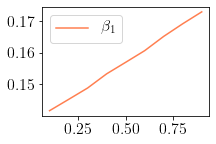

In [144]:
plt.rcParams['figure.figsize'] = (3.0, 2.0)
plt.plot(X, Y2, color='coral', label=r'$\beta_1$')
plt.legend() # 显示图例
savefig("参数实验4.jpg", dpi=300, bbox_inches='tight')
plt.show()

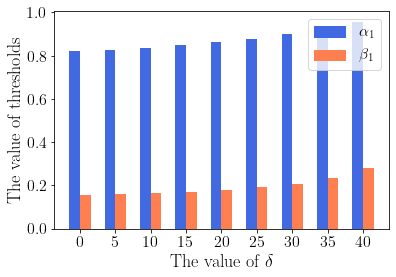

In [147]:
X = [0, 5, 10, 15, 20, 25, 30, 35, 40]
Y1 = [0.8200737593169851, 0.8277011190522876, 0.8369763268891386, 0.8482553274762158, 0.8620006741374204, 0.8788248029334497, 0.8995562615401136, 0.9253444762697131, 0.9578320292762272]
Y2 = [0.15621654686370276, 0.16014956427783483, 0.1650586318598251, 0.17133670812418816, 0.17961835358045894, 0.19099914778090718, 0.20754730579278174, 0.2336909772930521, 0.28092776457946045]
bar_width = 0.3 # 条形宽度
index_male = np.arange(len(X)) # 阈值1条形图的横坐标
index_female = index_male + bar_width # 阈值2条形图的横坐标
plt.rcParams['figure.figsize'] = (6.0, 4.0)
# 使用两次 bar 函数画出两组条形图
plt.bar(index_male, height=Y1, width=bar_width, color='royalblue', label=r'$\alpha_1$')
plt.bar(index_female, height=Y2, width=bar_width, color='coral', label=r'$\beta_1$')

plt.xticks(index_male + bar_width/2, X)
plt.xlabel('The value of 'r'$\delta$',font1)
plt.ylabel('The value of thresholds',font1)
plt.legend() # 显示图例
savefig("参数实验5.jpg", dpi=300, bbox_inches='tight')
plt.show()

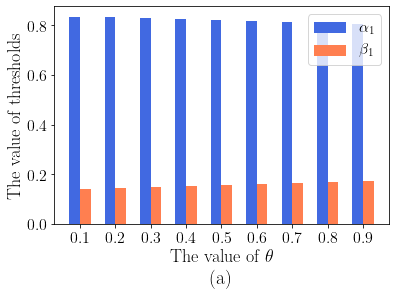

In [157]:
X = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 
Y1 = [0.8344121538709333, 0.8313879292245517, 0.8283285119304953, 0.8249345238173243, 0.8214817017658156, 0.8180033521728499, 0.8143149312520819, 0.8105891643386814, 0.8068422117808709]
Y2 = [0.14170754104983857, 0.14525800277113274, 0.14884615453215763, 0.15330935802710022, 0.15693880381758005, 0.16060216153379542, 0.16510130626568836, 0.16907808140429847, 0.17282561779846115]

plt.rcParams['figure.figsize'] = (6.0, 4.0)
bar_width = 0.3 # 条形宽度
index_male = np.arange(len(X)) # 阈值1条形图的横坐标
index_female = index_male + bar_width # 阈值2条形图的横坐标
# 使用两次 bar 函数画出两组条形图
plt.bar(index_male, height=Y1, width=bar_width, color='royalblue', label=r'$\alpha_1$')
plt.bar(index_female, height=Y2, width=bar_width, color='coral', label=r'$\beta_1$')
plt.xticks(index_male + bar_width/2, X)
plt.xlabel('The value of 'r'$\theta$',font1)
plt.ylabel('The value of thresholds',font1)
plt.legend() # 显示图例
plt.title('(a)', y=-0.3)
savefig("参数实验6.jpg", dpi=300, bbox_inches='tight')
plt.show()

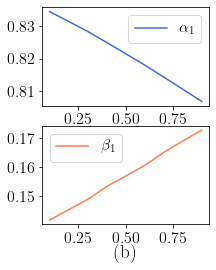

In [161]:
X = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 
Y1 = [0.8344121538709333, 0.8313879292245517, 0.8283285119304953, 0.8249345238173243, 0.8214817017658156, 0.8180033521728499, 0.8143149312520819, 0.8105891643386814, 0.8068422117808709]
Y2 = [0.14170754104983857, 0.14525800277113274, 0.14884615453215763, 0.15330935802710022, 0.15693880381758005, 0.16060216153379542, 0.16510130626568836, 0.16907808140429847, 0.17282561779846115]

plt.rcParams['figure.figsize'] = (3.0, 4.0)
a = subplot(2,1,1)
plt.plot(X, Y1, color='royalblue', label=r'$\alpha_1$')
plt.legend() # 显示图例
b = subplot(2,1,2)
b.plot(X, Y2, color='coral', label=r'$\beta_1$')
plt.legend() # 显示图例
plt.title('(b)', y=-0.4)
savefig("参数实验7.jpg", dpi=300, bbox_inches='tight')
plt.show()